In [8]:
%matplotlib inline

import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import cm as cmaps
from mpl_toolkits.axes_grid1 import make_axes_locatable

dimension = "2D2V"
R = 80
model = "hybrid"
steps = 8000
gamma = 1           # For hybrid, an additional parameter is needed
species = "p"
M = 20

dat_dir = "../../Data/{model}/{dimension}/Ma{M:g}".format(model=model, dimension=dimension, M=M)
dat_file = "{dir}/R{R:g}/number_density_{sp}_step{s:g}.dat".format(dir=dat_dir, R=R, sp=species, s=steps)
print("Loading data from {} ...".format(dat_file))
fields = np.genfromtxt(dat_file)
print("Loading data completed!")
print(np.shape(fields))


Loading data from ../../Data/hybrid/2D2V/Ma20/R80/number_density_p_step8000.dat ...
Loading data completed!
(1025, 2049)


In [28]:
n_screenout = 1e-6
ny, nx = fields.shape
dx = 1
dy = 1
nx_show = np.array([0,880+1])
ny_show = np.array([0,360+1])
x = dx * np.arange(nx)
y = dy * np.arange(ny)
X,Y = np.meshgrid(x,y)


In [33]:
fontsize_label=20
fontsize_tick=16

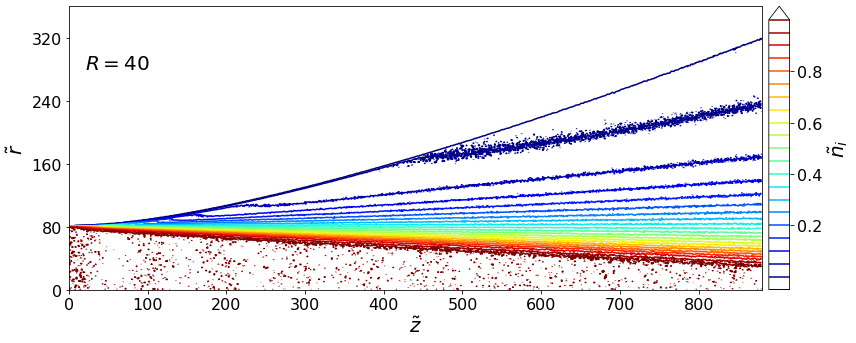

In [34]:
# ni contour
fig, ax = plt.subplots(figsize=(12, 8))

value_min = 0              
value_max = 1.0
value_step = 0.2

value_levels = np.zeros(22)
value_levels[0] = 1e-3
value_levels[1] = 1e-2
value_levels[2:-1] = np.arange(0.05, 0.951, 0.05)
value_levels[-1] = 0.98

cmap = plt.cm.get_cmap('jet')
cmap.set_over(cmaps.jet(255))
ch = ax.contour(X[ny_show[0]:ny_show[1], nx_show[0]:nx_show[1]],
                Y[ny_show[0]:ny_show[1], nx_show[0]:nx_show[1]],
                fields[ny_show[0]:ny_show[1], nx_show[0]:nx_show[1]],
                value_levels, extend="max",  cmap=cmap, origin="lower")
ax.set_aspect(1)                                                         #与'equal'相同，x,y有相同的缩放比例(消除白边)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)
cbar = plt.colorbar(ch, cax=cax)
cbar.set_label(label=r"$\tilde{n}_i$", fontsize=fontsize_label)
cbar.set_ticks(np.arange(value_min, value_max+value_step, value_step))
cbar.ax.tick_params(labelsize=fontsize_tick)
ax.set_xticks(np.arange(nx_show[0]*dx, nx_show[-1]*dx, 100))      #设置x刻度
ax.set_yticks(np.arange(ny_show[0]*dy, ny_show[-1]*dy, 80))      #设置y刻度
ax.set_xlabel(r"$\tilde{z}$", fontsize=fontsize_label)           #横轴标题
ax.set_ylabel(r"$\tilde{r}$", fontsize=fontsize_label)           #纵轴标题
ax.tick_params(labelsize=fontsize_tick)
ax.text(20, 280, "${R}=40$", fontsize = 20)
#img_name = "Fig/ni_contour_{model}_{dimension}".format(model=model, dimension=dimension)
fig.tight_layout()
# plt.savefig(img_name+".eps", dpi=200)
# plt.savefig(img_name+".png", dpi=200)
plt.show()


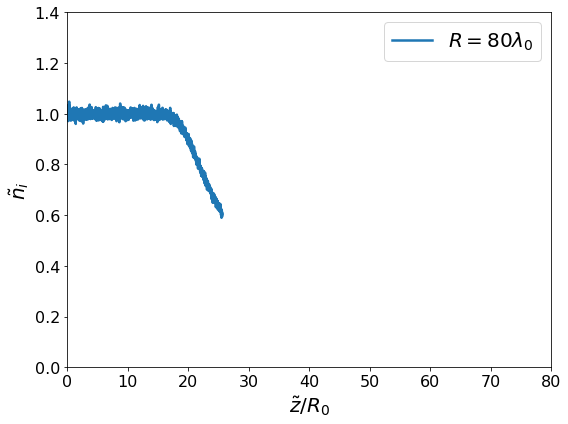

In [37]:
fig, ax = plt.subplots(figsize=(8, 6))
xnd = x/80
xbeg = 0
xend = 80
iy = 0
ax.plot(xnd, fields[iy, :], "-", label="${R}=80{\lambda}_0$",linewidth=2.5)
ax.set_xlim([0, xend])
ax.set_ylim([0, 0.1])
ax.set_xticks(np.arange(0, xend+1, 10))
ax.set_yticks(np.arange(0, 1.4+0.1, 0.2))

ax.legend(fontsize=fontsize_label)
ax.set_xlabel(r"$\tilde{z}/{R}_0$", fontsize=fontsize_label)
ax.set_ylabel(r"$\tilde{n}_{i}$", fontsize=fontsize_label)
ax.tick_params(labelsize=fontsize_tick)

img_name = "Fig/self_sim_ni"
fig.tight_layout()
# plt.savefig(img_name+".eps", dpi=200)
# plt.savefig(img_name+".png", dpi=200)
plt.show()
